In [831]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [832]:
academic = pd.read_csv("Stu_processed.csv")
money = pd.read_csv("Financial_processed.csv")

In [833]:
print(academic.shape)


(1789, 16)


In [834]:
academic.head()

,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,ProfID
0,18000007,C+,Business Management,77.13,2.23,ECO 110,Microeconomics,23,88.89,2,1,5,92126,32.908449,-117.14138,76
1,18000007,D,Integrated Core,63.00,2.23,INT 110,Critical Reasoning,23,50.00,2,1,5,92126,32.908449,-117.14138,29
2,18000007,C+,General Education,76.00,2.23,WRI 100,College Composition I,23,55.81,2,1,5,92126,32.908449,-117.14138,10
3,18000007,B+,General Education,87.00,2.23,MTH 100,College Algebra,23,60.00,2,1,5,92126,32.908449,-117.14138,57
4,18000007,A-,Business Management,92.39,2.25,MGT 315,Organizational Behavior,23,59.18,2,1,5,92126,32.908449,-117.14138,41


In [835]:
print(academic['Department'].value_counts())

General Education      513
Business Management    357
Integrated Core        312
Kinesiology            208
Natural Sciences       194
Arts and Humanities    149
Psychology              30
Other                   26
Name: Department, dtype: int64


In [836]:
academic = academic.assign(DeptCat=(academic['Department']).astype('category').cat.codes)
academic.sample(5)

,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,ProfID,DeptCat
887,2017000001,A,Business Management,95.29,2.65,BUS 498,Advanced Reading in Business,24,93.33,2,1,1,91942,32.777999,-117.021511,76,1
862,2016000080,C,Business Management,74.53,2.33,ACC 220,Financial Accounting,22,90.00,2,1,2,92113,32.696716,-117.117881,79,1
880,2016000082,B+,Business Management,87.00,1.82,MGT 320,HR and Talent Management,22,61.76,2,1,5,90713,33.847989,-118.112601,89,1
1160,2017000064,B-,Business Management,82.85,2.13,MGT 100,Foundations of Management,22,100.00,2,1,1,92373,34.011953,-117.159699,4,1
496,2016000043,A,Integrated Core,104.95,3.75,INT 210,Western Civilization &amp; the Formation of Ch...,20,97.83,3,0,1,95370,37.984549,-120.349264,20,3


In [837]:
academic = academic.assign(ProfClassCount=(academic['ProfID']).astype('category').cat.codes)
academic.head()

,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,ProfID,DeptCat,ProfClassCount
0,18000007,C+,Business Management,77.13,2.23,ECO 110,Microeconomics,23,88.89,2,1,5,92126,32.908449,-117.14138,76,1,43
1,18000007,D,Integrated Core,63.00,2.23,INT 110,Critical Reasoning,23,50.00,2,1,5,92126,32.908449,-117.14138,29,3,17
2,18000007,C+,General Education,76.00,2.23,WRI 100,College Composition I,23,55.81,2,1,5,92126,32.908449,-117.14138,10,2,4
3,18000007,B+,General Education,87.00,2.23,MTH 100,College Algebra,23,60.00,2,1,5,92126,32.908449,-117.14138,57,2,31
4,18000007,A-,Business Management,92.39,2.25,MGT 315,Organizational Behavior,23,59.18,2,1,5,92126,32.908449,-117.14138,41,1,24


In [838]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 20, 50, 100]

# Create the names for the four bins
#group_names represent these values = ["0-10", "20-50", "50-100"]

group_names = [1, 2, 3]

In [839]:
academic['ProfCount'] = pd.cut(academic['ProfID'], bins, labels=group_names)
academic.head()


,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,ProfID,DeptCat,ProfClassCount,ProfCount
0,18000007,C+,Business Management,77.13,2.23,ECO 110,Microeconomics,23,88.89,2,1,5,92126,32.908449,-117.14138,76,1,43,3
1,18000007,D,Integrated Core,63.00,2.23,INT 110,Critical Reasoning,23,50.00,2,1,5,92126,32.908449,-117.14138,29,3,17,2
2,18000007,C+,General Education,76.00,2.23,WRI 100,College Composition I,23,55.81,2,1,5,92126,32.908449,-117.14138,10,2,4,1
3,18000007,B+,General Education,87.00,2.23,MTH 100,College Algebra,23,60.00,2,1,5,92126,32.908449,-117.14138,57,2,31,3
4,18000007,A-,Business Management,92.39,2.25,MGT 315,Organizational Behavior,23,59.18,2,1,5,92126,32.908449,-117.14138,41,1,24,2


In [840]:
#print(academic['ProfCount'].value_counts())

In [841]:
#print(academic['Age'].value_counts())

In [842]:
#print(academic['Attendance'].value_counts())

In [843]:
academic['ProfCount'].value_counts()

2    714
3    646
1    420
Name: ProfCount, dtype: int64

In [844]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [16, 19, 21, 100]

# Create the names for the four bins
#group_names represent these ranges= ["17-19", "20-21", "Over 21"]
group_names = [1, 2, 3]

In [845]:

academic['AgeRange'] = pd.cut(academic['Age'], bins, labels=group_names)
academic.head()

,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,Latino,Race,ZIP,LAT,LNG,ProfID,DeptCat,ProfClassCount,ProfCount,AgeRange
0,18000007,C+,Business Management,77.13,2.23,ECO 110,Microeconomics,23,88.89,2,1,5,92126,32.908449,-117.14138,76,1,43,3,3
1,18000007,D,Integrated Core,63.00,2.23,INT 110,Critical Reasoning,23,50.00,2,1,5,92126,32.908449,-117.14138,29,3,17,2,3
2,18000007,C+,General Education,76.00,2.23,WRI 100,College Composition I,23,55.81,2,1,5,92126,32.908449,-117.14138,10,2,4,1,3
3,18000007,B+,General Education,87.00,2.23,MTH 100,College Algebra,23,60.00,2,1,5,92126,32.908449,-117.14138,57,2,31,3,3
4,18000007,A-,Business Management,92.39,2.25,MGT 315,Organizational Behavior,23,59.18,2,1,5,92126,32.908449,-117.14138,41,1,24,2,3


In [846]:
# Create the bins in which Data will be held
# Bins are 0, 60, 70, 80, 90, 100
bins = [0, 70, 80, 90, 100]

# Create the names for the four bins
#group_names represent these ranges = ["0-70", "70-80", "80-90", "90-100"]
group_names=[1, 2, 3, 4]

In [847]:


academic['AttendanceRange'] = pd.cut(academic['Attendance'], bins, labels=group_names)
academic.head()




,ID,LtrGrade,Department,Grade,Term_GPA,Course,Name,Age,Attendance,Gender,...,Race,ZIP,LAT,LNG,ProfID,DeptCat,ProfClassCount,ProfCount,AgeRange,AttendanceRange
0,18000007,C+,Business Management,77.13,2.23,ECO 110,Microeconomics,23,88.89,2,...,5,92126,32.908449,-117.14138,76,1,43,3,3,3
1,18000007,D,Integrated Core,63.00,2.23,INT 110,Critical Reasoning,23,50.00,2,...,5,92126,32.908449,-117.14138,29,3,17,2,3,1
2,18000007,C+,General Education,76.00,2.23,WRI 100,College Composition I,23,55.81,2,...,5,92126,32.908449,-117.14138,10,2,4,1,3,1
3,18000007,B+,General Education,87.00,2.23,MTH 100,College Algebra,23,60.00,2,...,5,92126,32.908449,-117.14138,57,2,31,3,3,1
4,18000007,A-,Business Management,92.39,2.25,MGT 315,Organizational Behavior,23,59.18,2,...,5,92126,32.908449,-117.14138,41,1,24,2,3,1


In [848]:
academic.to_csv('academic_info_and_bins.csv')

In [884]:
#select datapoints
stu = academic[['Age', 'Attendance', \
                 'Gender','Latino', 'Race', 'Grade', 'DeptCat', 'ProfCount']].copy()
stu.head()

,Age,Attendance,Gender,Latino,Race,Grade,DeptCat,ProfCount
0,23,88.89,2,1,5,77.13,1,3
1,23,50.00,2,1,5,63.00,3,2
2,23,55.81,2,1,5,76.00,2,1
3,23,60.00,2,1,5,87.00,2,3
4,23,59.18,2,1,5,92.39,1,2


In [885]:
academic.to_csv('binned_academic.csv')

In [886]:
stu['ProfCount'].value_counts()

2    714
3    646
1    420
Name: ProfCount, dtype: int64

In [887]:
stu.count()

Age           1789
Attendance    1789
Gender        1789
Latino        1789
Race          1789
Grade         1789
DeptCat       1789
ProfCount     1780
dtype: int64

In [888]:
money.head()

,ID,Grants,Loans,Federal,Institutional,Net_Total,YearBegin,YearCat
0,2016000026,13490.5,5500.0,7333.0,10657.5,18934.5,2016,0
1,AC2802324,18065.5,7500.0,11183.0,14382.5,25487.5,2016,0
2,2016000037,11700.0,6500.0,6500.0,11700.0,18132.0,2016,0
3,2016000055,6000.0,5500.0,5500.0,6000.0,11444.0,2016,0
4,AR7969044,14745.5,6500.0,9383.0,11862.5,21177.5,2016,0


In [889]:
money.head()

,ID,Grants,Loans,Federal,Institutional,Net_Total,YearBegin,YearCat
0,2016000026,13490.5,5500.0,7333.0,10657.5,18934.5,2016,0
1,AC2802324,18065.5,7500.0,11183.0,14382.5,25487.5,2016,0
2,2016000037,11700.0,6500.0,6500.0,11700.0,18132.0,2016,0
3,2016000055,6000.0,5500.0,5500.0,6000.0,11444.0,2016,0
4,AR7969044,14745.5,6500.0,9383.0,11862.5,21177.5,2016,0


In [890]:
money['YearCat'].value_counts()

2    171
1    125
0     70
Name: YearCat, dtype: int64

In [891]:
money['Loans'].value_counts(bins=3)

(329.742, 13120.333]      252
(13120.333, 25872.667]     64
(25872.667, 38625.0]       50
Name: Loans, dtype: int64

In [892]:
money.head()

,ID,Grants,Loans,Federal,Institutional,Net_Total,YearBegin,YearCat
0,2016000026,13490.5,5500.0,7333.0,10657.5,18934.5,2016,0
1,AC2802324,18065.5,7500.0,11183.0,14382.5,25487.5,2016,0
2,2016000037,11700.0,6500.0,6500.0,11700.0,18132.0,2016,0
3,2016000055,6000.0,5500.0,5500.0,6000.0,11444.0,2016,0
4,AR7969044,14745.5,6500.0,9383.0,11862.5,21177.5,2016,0


In [893]:
#stu.Term_GPA.describe()

In [894]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [895]:
# # Skewness
# print("Skewness is: ", stu.Term_GPA.skew())
# plt.hist(stu.Term_GPA, color='orange')
# plt.show()

In [896]:
# merge_table = pd.merge(stu, dfM, on="ID", how="outer")
# merge_table

In [897]:
# target = np.log(stu.Term_GPA)
# print("Skewness is: ", target.skew())
# plt.hist(target, color='blue')
# plt.show()

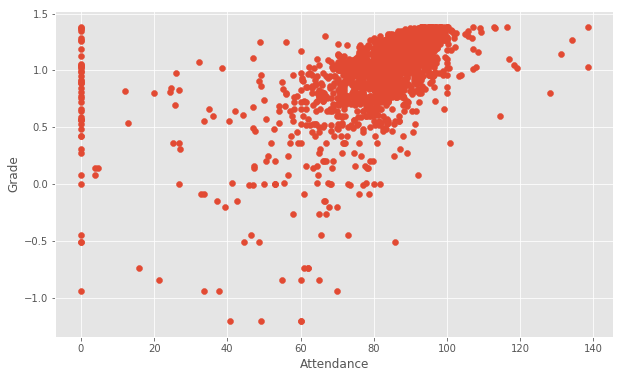

In [898]:
plt.scatter(x=stu['Grade'], y=target)
plt.ylabel("Grade")
plt.xlabel("Attendance")
plt.show()

In [899]:
np.where(stu.values >= np.finfo(np.float64).max)


(array([], dtype=int64), array([], dtype=int64))

In [900]:
stu.ProfCount.describe()

count     1780
unique       3
top          2
freq       714
Name: ProfCount, dtype: int64

In [901]:
print(stu['ProfCount'].value_counts())

2    714
3    646
1    420
Name: ProfCount, dtype: int64


In [914]:
#print(pd.get_dummies(stu['ProfCount']))

In [915]:
# from sklearn.preprocessing import Imputer
# # Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
# mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# # Train the imputor on the df dataset
# mean_imputer = mean_imputer.fit(stu)


# # Apply the imputer to the df dataset
# imputed_df = mean_imputer.transform(stu.values)


In [916]:
list(stu['ProfCount'].unique())


[3, 2, 1]

In [917]:

stu = stu[pd.notnull(stu['ProfCount'])]
#stu

In [918]:
list(stu['ProfCount'].unique())

[3, 2, 1]

In [919]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = stu[['Age', 'Attendance', 'Gender','Latino', 'Race', 'DeptCat', 'ProfCount']]
y = stu[["Grade"]].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION



(1780, 7) (1780, 1)


In [920]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
### END SOLUTION

In [921]:
#stu.dtypes

In [922]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.0974361646553824
